# Bibliography

https://www.youtube.com/watch?v=kApPBm1YsqU

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

https://stackoverflow.com/questions/37815987/plot-a-correlation-circle-in-python

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import plotly.express as px
import plotly.graph_objects as go

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.datasets import load_iris

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html <br />
http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html

# PCA on iris dataset

### Load, normalize and visualize data

In [40]:
# Load Iris Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width', 'petal length','petal width','target']) 
df

sepal length  sepal width  petal length  petal width          target
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

In [41]:
scaler = StandardScaler()
features = ['sepal length','sepal width', 'petal length','petal width']
X = scaler.fit_transform(df[features])  # fit_transform returns a numpy array
# transform back to dataframe
df[features] = X
df

sepal length  sepal width  petal length  petal width          target
0       -0.900681     1.032057     -1.341272    -1.312977     Iris-setosa
1       -1.143017    -0.124958     -1.341272    -1.312977     Iris-setosa
2       -1.385353     0.337848     -1.398138    -1.312977     Iris-setosa
3       -1.506521     0.106445     -1.284407    -1.312977     Iris-setosa
4       -1.021849     1.263460     -1.341272    -1.312977     Iris-setosa
..            ...          ...           ...          ...             ...
145      1.038005    -0.124958      0.819624     1.447956  Iris-virginica
146      0.553333    -1.281972      0.705893     0.922064  Iris-virginica
147      0.795669    -0.124958      0.819624     1.053537  Iris-virginica
148      0.432165     0.800654      0.933356     1.447956  Iris-virginica
149      0.068662    -0.124958      0.762759     0.790591  Iris-virginica

[150 rows x 5 columns]

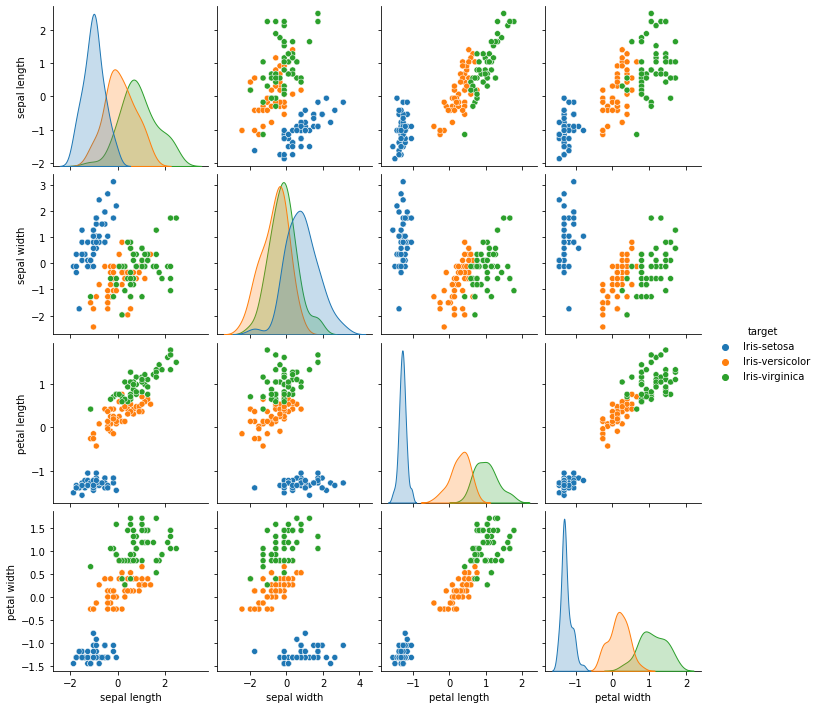

In [42]:
sns.pairplot(df, diag_kind='kde',hue="target")

### Covariance matrix

In [43]:
corr = df[features].corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)   # display options

### PCA

In [44]:
n_components = 4

In [45]:
pca = PCA(n_components = n_components)

pca.fit(df[features])

PCA(n_components=4)

In [46]:
# coordinates of the PCs (rows) in the original feature basis (columns) 
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [80]:
# all the components are indeed orthogonal
c = pca.components_
np.matmul(c,c.transpose())

array([[ 1.00000000e+00,  1.38777878e-17, -1.11022302e-16,
         1.11022302e-16],
       [ 1.38777878e-17,  1.00000000e+00, -4.16333634e-17,
        -4.16333634e-17],
       [-1.11022302e-16, -4.16333634e-17,  1.00000000e+00,
         0.00000000e+00],
       [ 1.11022302e-16, -4.16333634e-17,  0.00000000e+00,
         1.00000000e+00]])

In [47]:
pca.singular_values_

array([20.89551896, 11.75513248,  4.7013819 ,  1.75816839])

In [48]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

### Projection and visualisation

In [50]:
df_proj = pca.transform(df[features])

df_proj = pd.DataFrame(data = df_proj, 
                       columns = ["Principal Component " + str(i) for i in range(1, n_components+1)]) 
df_proj = pd.concat([df_proj, df[["target"]]], axis = "columns")
df_proj

Principal Component 1  Principal Component 2  Principal Component 3  \
0                -2.264542               0.505704              -0.121943   
1                -2.086426              -0.655405              -0.227251   
2                -2.367950              -0.318477               0.051480   
3                -2.304197              -0.575368               0.098860   
4                -2.388777               0.674767               0.021428   
..                     ...                    ...                    ...   
145               1.870522               0.382822               0.254532   
146               1.558492              -0.905314              -0.025382   
147               1.520845               0.266795               0.179277   
148               1.376391               1.016362               0.931405   
149               0.959299              -0.022284               0.528794   

     Principal Component 4          target  
0                -0.023073     Iris-setosa  
1                -0.103208     Iris-setosa  
2                -0.027825     Iris-setosa  
3                 0.066311     Iris-setosa  
4                 0.037397     Iris-setosa  
..                     ...             ...  
145              -0.388890  Iris-virginica  
146              -0.221322  Iris-virginica  
147              -0.118903  Iris-virginica  
148              -0.024146  Iris-virginica  
149               0.163676  Iris-virginica  

[150 rows x 5 columns]

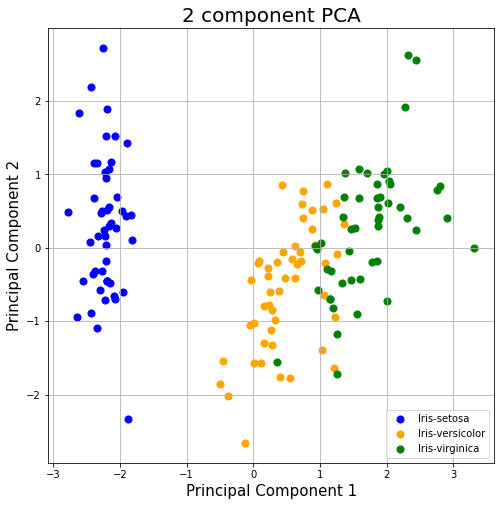

In [101]:
x_component = 'Principal Component 1'
y_component = 'Principal Component 2'

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel(x_component, fontsize = 15)
ax.set_ylabel(y_component, fontsize = 15)
ax.set_title("2 component PCA", fontsize = 20)

targets  = np.unique(df_proj.loc[:, ["target"]].values)
color = ["blue", "orange", "green"]

for target, color in zip(targets, color):
    indicesToKeep = df_proj["target"] == target
    ax.scatter(df_proj.loc[indicesToKeep, x_component],
               df_proj.loc[indicesToKeep, y_component],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()

### Explained Variance : Explained Variance Plot and Cummulated Explained Variance Plot

In [52]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

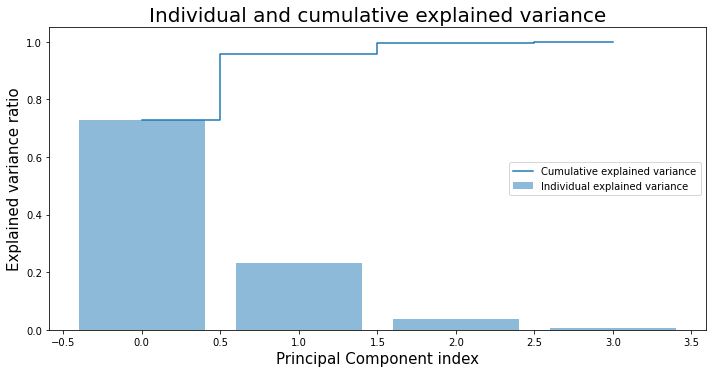

In [53]:
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.figure(figsize=(10,5))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio', fontsize = 15)
plt.xlabel('Principal Component index', fontsize = 15)
plt.legend(loc='best')
plt.tight_layout()
plt.title('Individual and cumulative explained variance', fontsize = 20)
plt.show()

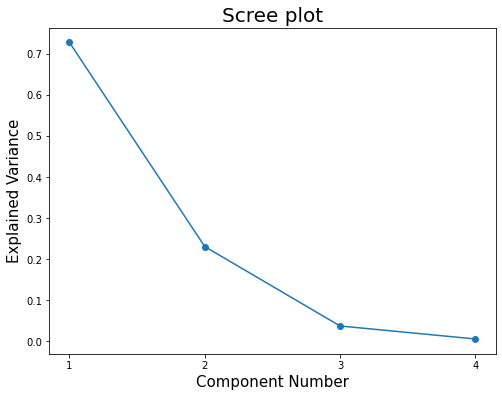

In [62]:
# scree plot
ind = list(np.arange(1, n_components+1))
(fig, ax) = plt.subplots(figsize=(8, 6))
plt.plot(ind, pca.explained_variance_ratio_, 'o-')
ax.set_title('Scree plot', fontsize = 20)
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number', fontsize = 15)
ax.set_ylabel('Explained Variance', fontsize = 15)

ax.xaxis.set_ticklabels(ind)
plt.show()

### Circles

Which variable is correlated with axis ??

Can you interpret axes ???

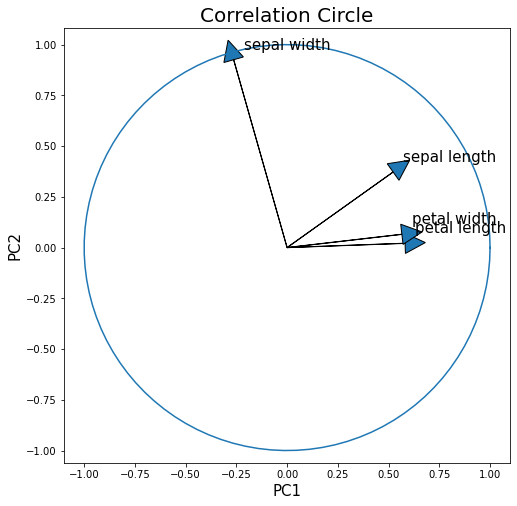

In [76]:
# Plot a variable factor map for the first two dimensions.

(fig, ax) = plt.subplots(figsize=(8, 8))

x_component_position = 1
y_component_position = 2

for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[x_component_position - 1, i],  #0 for PC1
             pca.components_[y_component_position - 1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[x_component_position-1, i] + 0.05,
             pca.components_[y_component_position-1, i] + 0.05,
             df.columns.values[i], fontsize = 15)

plt.xlabel("PC" + str(x_component_position), fontsize = 15)
plt.ylabel("PC" + str(y_component_position), fontsize = 15)
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Correlation Circle', fontsize = 20)
plt.show()  

In [67]:
# another library to compute PCA and plot correlation circle
from mlxtend.data import iris_data
from mlxtend.plotting import plot_pca_correlation_graph

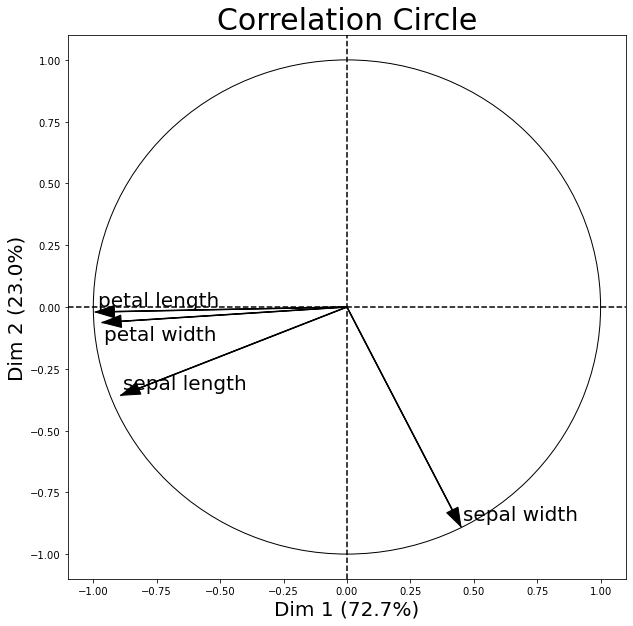

In [75]:
figure, correlation_matrix = plot_pca_correlation_graph(df[features], 
                                                        df[features].columns,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)